Enter a region name (or 'done' if finished): wa
Enter the adjacent regions separated by spaces: nt sa
Enter a region name (or 'done' if finished): nt
Enter the adjacent regions separated by spaces: wa sa q
Enter a region name (or 'done' if finished): sa
Enter the adjacent regions separated by spaces: wa nt q nsw v
Enter a region name (or 'done' if finished): q
Enter the adjacent regions separated by spaces: nt sa nsw
Enter a region name (or 'done' if finished): nsw
Enter the adjacent regions separated by spaces: q sa v
Enter a region name (or 'done' if finished): v
Enter the adjacent regions separated by spaces: sa nsw
Enter a region name (or 'done' if finished): t
Enter the adjacent regions separated by spaces: 
Enter a region name (or 'done' if finished): done
The selected region is sa
The selected region is nt
The selected region is q
The selected region is nsw
The selected region is wa
The selected region is v
The selected region is t
{'sa': 'red', 'nt': 'green', 'q': 'blue', 'nsw'

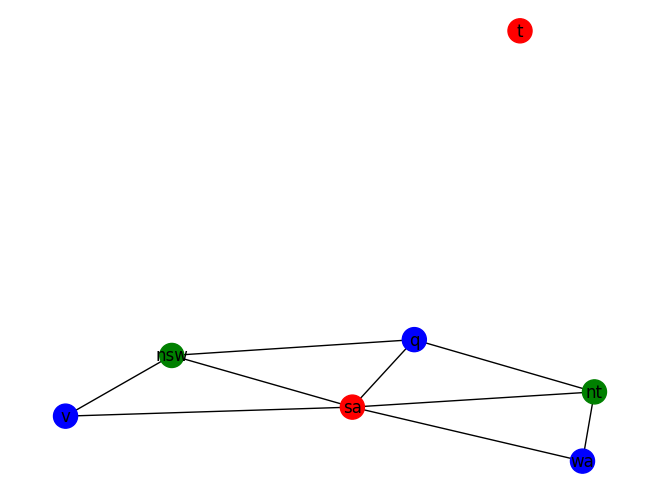

In [ ]:
# Get the regions and their adjacent regions from the user
import networkx as nx
import matplotlib.pyplot as plt

regions = {}
while True:
    region = input("Enter a region name (or 'done' if finished): ")
    if region == 'done':
        break
    adjacent_regions = input("Enter the adjacent regions separated by spaces: ").split()
    regions[region] = adjacent_regions

# Define the colors
colors = ['red', 'green','blue']

# Define a function to check if a region can be assigned a color
def can_color(region, color, coloring):
    for adjacent_region in regions[region]:
        if adjacent_region in coloring and coloring[adjacent_region] == color:
            return False
    return True

# Define a function to get the remaining colors for a region
def remaining_colors(region, coloring):
    used_colors = set(coloring.values())
    return [color for color in colors if color not in used_colors or can_color(region, color, coloring)]

# Define a function to choose the next region to color based on MRV
def choose_mrv(uncolored_regions, coloring):
    return min(uncolored_regions, key=lambda region: len(remaining_colors(region, coloring)))

# Define a function to choose the next color for a region based on LCV
def choose_lcv(region, coloring):
    return sorted(remaining_colors(region, coloring), key=lambda color: sum(can_color(adjacent_region, color, coloring) for adjacent_region in regions[region]))


# Define a function to choose the next region to color based on degree heuristic
def choose_degree(uncolored_regions, coloring):
    max_degree = max(len(regions[region]) for region in uncolored_regions)
    regions_with_max_degree = [region for region in uncolored_regions if len(regions[region]) == max_degree]
    if len(regions_with_max_degree) == 1:
        return regions_with_max_degree[0]
    else:
        return choose_mrv(regions_with_max_degree, coloring)


# Define a recursive function to assign colors to regions
def color_map(coloring, uncolored_regions):
    # Base case: All regions have been colored
    if not uncolored_regions:
        return coloring

    # Choose the next region to color based on MRV and degree heuristic
    region = choose_degree(uncolored_regions,coloring)
    print("The selected region is "+region)


    # Try each color for the region based on LCV
    for color in choose_lcv(region, coloring):
        if can_color(region, color, coloring):
            # If the color is valid, assign it to the region
            coloring[region] = color

            # Recursively color the remaining regions
            solution = color_map(coloring, [r for r in uncolored_regions if r != region])
            if solution:
                # If a valid coloring is found, return it
                return solution

            # If a valid coloring is not found, backtrack and try a different color
            del coloring[region]

    # If no valid coloring is found, return None
    return None

# Solve the problem
coloring = color_map({}, list(regions.keys()))

# Print the solution
if coloring:
  print(coloring)
  # Create a graph and add the regions as nodes
  G = nx.Graph()
  G.add_nodes_from(list(regions.keys()))

# Add the edges between adjacent regions
  for region, adjacent_regions in regions.items():
    for adjacent_region in adjacent_regions:
        G.add_edge(region, adjacent_region)

# Define a function to get the color of a node
  def get_node_color(node):
    if node in coloring:
        return coloring[node]
    else:
        return 'gray'

# Define a function to get the node labels
  def get_node_labels():
    labels = {}
    for node in G.nodes:
        labels[node] = node
    return labels

# Draw the graph with colored nodes and labels
  nx.draw(G, node_color=[get_node_color(node) for node in G.nodes], labels=get_node_labels(), with_labels=True)
  plt.show()
#print(coloring)


else:
  print("Color not sufficient")

Enter a region name (or 'done' if finished): o
Enter the adjacent regions separated by spaces: a s m
Enter a region name (or 'done' if finished): a
Enter the adjacent regions separated by spaces: o i
Enter a region name (or 'done' if finished): i
Enter the adjacent regions separated by spaces: a s
Enter a region name (or 'done' if finished): s
Enter the adjacent regions separated by spaces: i m o
Enter a region name (or 'done' if finished): m
Enter the adjacent regions separated by spaces: o s n l
Enter a region name (or 'done' if finished): n
Enter the adjacent regions separated by spaces: m l
Enter a region name (or 'done' if finished): l
Enter the adjacent regions separated by spaces: n m
Enter a region name (or 'done' if finished): done
The selected region is m
The selected region is o
The selected region is s
The selected region is a
The selected region is i
The selected region is n
The selected region is l
{'m': 'red', 'o': 'green', 's': 'blue', 'a': 'blue', 'i': 'green', 'n': 'g

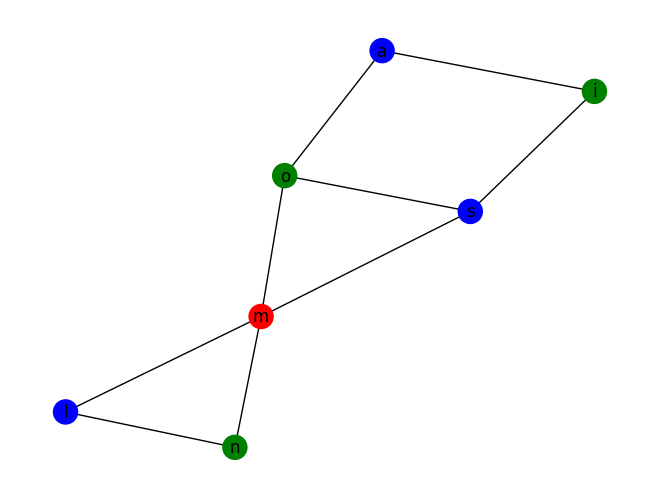

In [ ]:
# Get the regions and their adjacent regions from the user
import networkx as nx
import matplotlib.pyplot as plt

regions = {}
while True:
    region = input("Enter a region name (or 'done' if finished): ")
    if region == 'done':
        break
    adjacent_regions = input("Enter the adjacent regions separated by spaces: ").split()
    regions[region] = adjacent_regions

# Define the colors
colors = ['red', 'green','blue']

# Define a function to check if a region can be assigned a color
def can_color(region, color, coloring):
    for adjacent_region in regions[region]:
        if adjacent_region in coloring and coloring[adjacent_region] == color:
            return False
    return True

# Define a function to get the remaining colors for a region
def remaining_colors(region, coloring):
    used_colors = set(coloring.values())
    return [color for color in colors if color not in used_colors or can_color(region, color, coloring)]

# Define a function to choose the next region to color based on MRV
def choose_mrv(uncolored_regions, coloring):
    return min(uncolored_regions, key=lambda region: len(remaining_colors(region, coloring)))

# Define a function to choose the next color for a region based on LCV
def choose_lcv(region, coloring):
    return sorted(remaining_colors(region, coloring), key=lambda color: sum(can_color(adjacent_region, color, coloring) for adjacent_region in regions[region]))


# Define a function to choose the next region to color based on degree heuristic
def choose_degree(uncolored_regions, coloring):
    max_degree = max(len(regions[region]) for region in uncolored_regions)
    regions_with_max_degree = [region for region in uncolored_regions if len(regions[region]) == max_degree]
    if len(regions_with_max_degree) == 1:
        return regions_with_max_degree[0]
    else:
        return choose_mrv(regions_with_max_degree, coloring)


# Define a recursive function to assign colors to regions
def color_map(coloring, uncolored_regions):
    # Base case: All regions have been colored
    if not uncolored_regions:
        return coloring

    # Choose the next region to color based on MRV and degree heuristic
    region = choose_degree(uncolored_regions,coloring)
    print("The selected region is "+region)


    # Try each color for the region based on LCV
    for color in choose_lcv(region, coloring):
        if can_color(region, color, coloring):
            # If the color is valid, assign it to the region
            coloring[region] = color

            # Recursively color the remaining regions
            solution = color_map(coloring, [r for r in uncolored_regions if r != region])
            if solution:
                # If a valid coloring is found, return it
                return solution

            # If a valid coloring is not found, backtrack to try a different color
            del coloring[region]

    # If no valid coloring is found, return None
    return None

# Solve the problem
coloring = color_map({}, list(regions.keys()))

# Print the solution
if coloring:
  print(coloring)
  # Create a graph and add the regions as nodes
  G = nx.Graph()
  G.add_nodes_from(list(regions.keys()))

# Add the edges between adjacent regions
  for region, adjacent_regions in regions.items():
    for adjacent_region in adjacent_regions:
        G.add_edge(region, adjacent_region)

# Define a function to get the color of a node
  def get_node_color(node):
    if node in coloring:
        return coloring[node]
    else:
        return 'gray'

# Define a function to get the node labels
  def get_node_labels():
    labels = {}
    for node in G.nodes:
        labels[node] = node
    return labels

# Draw the graph with colored nodes and labels
  nx.draw(G, node_color=[get_node_color(node) for node in G.nodes], labels=get_node_labels(), with_labels=True)
  plt.show()
#print(coloring)

else:
  print("Color not sufficient")

In [ ]:
# Get the regions and their adjacent regions from the user
import networkx as nx
import matplotlib.pyplot as plt

regions = {}
while True:
    region = input("Enter a region name (or 'done' if finished): ")
    if region == 'done':
        break
    adjacent_regions = input("Enter the adjacent regions separated by spaces: ").split()
    regions[region] = adjacent_regions

# Define the colors
colors = ['red', 'green']

# Define a function to check if a region can be assigned a color
def can_color(region, color, coloring):
    for adjacent_region in regions[region]:
        if adjacent_region in coloring and coloring[adjacent_region] == color:
            return False
    return True

# Define a function to get the remaining colors for a region
def remaining_colors(region, coloring):
    used_colors = set(coloring.values())
    return [color for color in colors if color not in used_colors or can_color(region, color, coloring)]

# Define a function to choose the next region to color based on MRV
def choose_mrv(uncolored_regions, coloring):
    return min(uncolored_regions, key=lambda region: len(remaining_colors(region, coloring)))

# Define a function to choose the next color for a region based on LCV
def choose_lcv(region, coloring):
    return sorted(remaining_colors(region, coloring), key=lambda color: sum(can_color(adjacent_region, color, coloring) for adjacent_region in regions[region]))


# Define a function to choose the next region to color based on degree heuristic
def choose_degree(uncolored_regions, coloring):
    max_degree = max(len(regions[region]) for region in uncolored_regions)
    regions_with_max_degree = [region for region in uncolored_regions if len(regions[region]) == max_degree]
    if len(regions_with_max_degree) == 1:
        return regions_with_max_degree[0]
    else:
        return choose_mrv(regions_with_max_degree, coloring)


# Define a recursive function to assign colors to regions
def color_map(coloring, uncolored_regions):
    # Base case: All regions have been colored
    if not uncolored_regions:
        return coloring

    # Choose the next region to color based on MRV and degree heuristic
    region = choose_degree(uncolored_regions,coloring)
    print("The selected region is "+region)


    # Try each color for the region based on LCV
    for color in choose_lcv(region, coloring):
        if can_color(region, color, coloring):
            # If the color is valid, assign it to the region
            coloring[region] = color

            # Recursively color the remaining regions
            solution = color_map(coloring, [r for r in uncolored_regions if r != region])
            if solution:
                # If a valid coloring is found, return it
                return solution

            # If a valid coloring is not found, backtrack and try a different color
            del coloring[region]

    # If no valid coloring is found, return None
    return None

# Solve the problem
coloring = color_map({}, list(regions.keys()))

# Print the solution
if coloring:
  print(coloring)
  # Create a graph and add the regions as nodes
  G = nx.Graph()
  G.add_nodes_from(list(regions.keys()))


# Add the edges between adjacent regions
  for region, adjacent_regions in regions.items():
    for adjacent_region in adjacent_regions:
        G.add_edge(region, adjacent_region)

# Define a function to get the color of a node
  def get_node_color(node):
    if node in coloring:
        return coloring[node]
    else:
        return 'gray'

# Define a function to get the node labels
  def get_node_labels():
    labels = {}
    for node in G.nodes:
        labels[node] = node
    return labels

# Draw the graph with colored nodes and labels
  nx.draw(G, node_color=[get_node_color(node) for node in G.nodes], labels=get_node_labels(), with_labels=True)
  plt.show()
#print(coloring)

else:
  print("Color not sufficient")

Enter a region name (or 'done' if finished): wa
Enter the adjacent regions separated by spaces: nt sa
Enter a region name (or 'done' if finished): nt
Enter the adjacent regions separated by spaces: wa sa q
Enter a region name (or 'done' if finished): sa
Enter the adjacent regions separated by spaces: wa nt q nsw v
Enter a region name (or 'done' if finished): q
Enter the adjacent regions separated by spaces: nt sa nsw
Enter a region name (or 'done' if finished): nsw
Enter the adjacent regions separated by spaces: q sa v
Enter a region name (or 'done' if finished): v
Enter the adjacent regions separated by spaces: sa nsw
Enter a region name (or 'done' if finished): t
Enter the adjacent regions separated by spaces: 
Enter a region name (or 'done' if finished): done
The selected region is sa
The selected region is nt
The selected region is q
The selected region is nt
The selected region is q
Color not sufficient


Enter a region name (or 'done' if finished): wa
Enter the adjacent regions separated by spaces: nt sa
Enter a region name (or 'done' if finished): nt
Enter the adjacent regions separated by spaces: wa sa q
Enter a region name (or 'done' if finished): sa
Enter the adjacent regions separated by spaces: wa nt q nsw v
Enter a region name (or 'done' if finished): q
Enter the adjacent regions separated by spaces: nt sa nsw
Enter a region name (or 'done' if finished): nsw
Enter the adjacent regions separated by spaces: q sa v
Enter a region name (or 'done' if finished): v
Enter the adjacent regions separated by spaces: sa nsw
Enter a region name (or 'done' if finished): t
Enter the adjacent regions separated by spaces: 
Enter a region name (or 'done' if finished): done
The selected region is sa
The selected region is nt
The selected region is q
The selected region is nsw
The selected region is wa
The selected region is v
The selected region is t
{'sa': 'red', 'nt': 'green', 'q': 'blue', 'nsw'

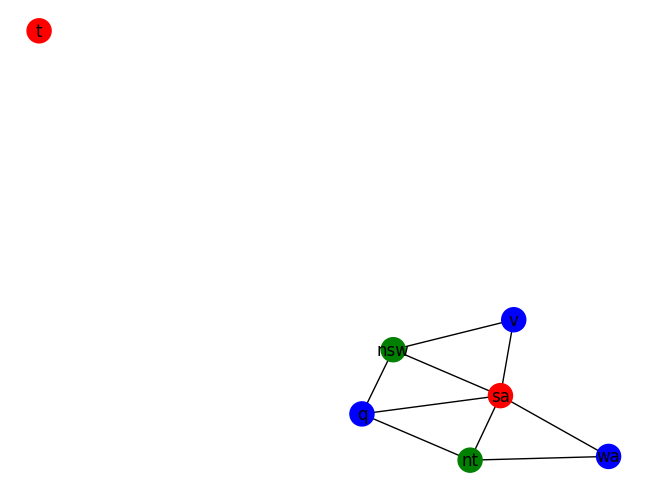

In [ ]:
# Get the regions and their adjacent regions from the user
import networkx as nx
import matplotlib.pyplot as plt

regions = {}
while True:
    region = input("Enter a region name (or 'done' if finished): ")
    if region == 'done':
        break
    adjacent_regions = input("Enter the adjacent regions separated by spaces: ").split()
    regions[region] = adjacent_regions

# Define the colors
colors = ['red', 'green','blue']

# Define a function to check if a region can be assigned a color
def can_color(region, color, coloring):
    for adjacent_region in regions[region]:
        if adjacent_region in coloring and coloring[adjacent_region] == color:
            return False
    return True

# Define a function to get the remaining colors for a region
def remaining_colors(region, coloring):
    used_colors = set(coloring.values())
    return [color for color in colors if color not in used_colors or can_color(region, color, coloring)]

# Define a function to choose the next region to color based on MRV
def choose_mrv(uncolored_regions, coloring):
    return min(uncolored_regions, key=lambda region: len(remaining_colors(region, coloring)))

# Define a function to choose the next color for a region based on LCV
def choose_lcv(region, coloring):
    return sorted(remaining_colors(region, coloring), key=lambda color: sum(can_color(adjacent_region, color, coloring) for adjacent_region in regions[region]))


# Define a function to choose the next region to color based on degree heuristic
def choose_degree(uncolored_regions, coloring):
    max_degree = max(len(regions[region]) for region in uncolored_regions)
    regions_with_max_degree = [region for region in uncolored_regions if len(regions[region]) == max_degree]
    if len(regions_with_max_degree) == 1:
        return regions_with_max_degree[0]
    else:
        return choose_mrv(regions_with_max_degree, coloring)


# Define a recursive function to assign colors to regions
def color_map(coloring, uncolored_regions):
    # Base case: All regions have been colored
    if not uncolored_regions:
        return coloring

    # Choose the next region to color based on MRV and degree heuristic
    region = choose_degree(uncolored_regions,coloring)
    print("The selected region is "+region)


    # Try each color for the region based on LCV
    for color in choose_lcv(region, coloring):
        if can_color(region, color, coloring):
            # If the color is valid, assign it to the region
            coloring[region] = color

            # Recursively color the remaining regions
            solution = color_map(coloring, [r for r in uncolored_regions if r != region])
            if solution:
                # If a valid coloring is found, return it
                return solution

            # If a valid coloring is not found, backtrack and try a different color
            del coloring[region]

    # If no valid coloring is found, return None
    return None

# Solve the problem
coloring = color_map({}, list(regions.keys()))

# Print the solution
if coloring:
  print(coloring)
  # Create a graph and add the regions as nodes
  G = nx.Graph()
  G.add_nodes_from(list(regions.keys()))


# Add the edges between adjacent regions
  for region, adjacent_regions in regions.items():
    for adjacent_region in adjacent_regions:
        G.add_edge(region, adjacent_region)

# Define a function to get the color of a node
  def get_node_color(node):
    if node in coloring:
        return coloring[node]
    else:
        return 'gray'

# Define a function to get the node labels
  def get_node_labels():
    labels = {}
    for node in G.nodes:
        labels[node] = node
    return labels

# Draw the graph with colored nodes and labels
  nx.draw(G, node_color=[get_node_color(node) for node in G.nodes], labels=get_node_labels(), with_labels=True)
  plt.show()
#print(coloring)

else:
  print("Color not sufficient")